In [ ]:
import pandas as pd

# This script downloads the dataset from Hugging Face Hub and loads it into a pandas DataFrame.
# Make sure to install the required libraries first: which is the huggingface_hub library. and pyarrow for parquet support. and fastparquet for parquet support.
# Login using e.g. `huggingface-cli login` to access this dataset

splits = {'train': 'train.parquet', 'test': 'test.parquet', 'validation': 'validation.parquet'}
df = pd.read_parquet("hf://datasets/ComplexDataLab/Misinfo_Datasets/" + splits["train"])


In [117]:
import pandas as pd
newdf = pd.read_json('./users_following.json')

In [118]:
adjDict = {}

In [50]:
newdf

,user_id,followingList
0,119207499,"[{'id': '351838853'}, {'id': '174705254'}, {'i..."
1,352931200,"[{'id': '158342368'}, {'id': '94324983'}, {'id..."
2,1194268750696108032,"[{'id': '1530033576'}, {'id': '904700529988820..."
3,1078546238344257536,"[{'id': '2711527526'}, {'id': '2933802163'}, {..."
4,1033732377900720128,"[{'id': '14175375'}, {'id': '1345110602'}, {'i..."
5,1191978160478392320,[{'id': '478432912'}]
6,894135703,"[{'id': '2283789074'}, {'id': '998645077386948..."
7,151115866,"[{'id': '28395223'}, {'id': '24894213'}, {'id'..."
8,154271726,"[{'id': '132981804'}, {'id': '133747127'}, {'i..."
9,3402412635,"[{'id': '364156949'}, {'id': '338548870'}, {'i..."


In [119]:
for index, row in newdf.iterrows():
    rowdf = pd.DataFrame(row.followingList)
    adjList = []
    for user_id in newdf.user_id:
        if rowdf[rowdf['id'] == row.user_id].shape[0] != 0:
            adjList.append(user_id)
        adjDict[user_id] = adjList

In [56]:
rowdf

,id
0,1548085674141618177
1,187453379
2,42386100
3,17920042
4,3480694337
...,...
2028,2962791503
2029,3018960919
2030,244452577
2031,18643437


In [120]:
adjDict

{119207499: [],
 352931200: [],
 1194268750696108032: [],
 1078546238344257536: [],
 1033732377900720128: [],
 1191978160478392320: [],
 894135703: [],
 151115866: [],
 154271726: [],
 3402412635: [],
 923344636512317440: [],
 202956039: [],
 1253996347688202240: [],
 916355359945699328: [],
 3818365535: [],
 33025341: [],
 1181148869880696832: [],
 984464581975314432: [],
 863383249: [],
 1064152637648658432: [],
 880099198779215872: [],
 723369766941904896: [],
 166326763: [],
 385696419: [],
 762845055442833408: [],
 15679641: [],
 263342339: [],
 1184381831342415872: [],
 177684507: [],
 912060785379221504: [],
 1250780694953025536: [],
 756596881019506688: [],
 2945341004: [],
 618047875: [],
 1223580162639396864: [],
 769105399979073536: [],
 760477613869690880: [],
 842196547: [],
 4899154871: [],
 29571099: [],
 340834419: [],
 1211592821431402496: [],
 1209838558468403200: [],
 1216913194175868928: [],
 3019256277: [],
 2543982944: [],
 517255438: [],
 1155204354028318720: [],

In [121]:
followingListAll = []
# iterates through every row in the df
for index, row in newdf.iterrows():
    rowdf = pd.DataFrame(row.followingList)
    followingListAll.append([[row.user_id, tid] for tid in rowdf.id])


In [122]:
followingdf = pd.concat([pd.DataFrame(lst) for lst in followingListAll], axis=0, ignore_index=True)
followingdf = followingdf.rename(columns={0 : "orig_id", 1 : "following_id"})
followingdf

,orig_id,following_id
0,119207499,351838853
1,119207499,174705254
2,119207499,933485263317237760
3,119207499,835608547
4,119207499,392258536
...,...,...
118436,1244931653925036032,1307725646
118437,1244931653925036032,364761398
118438,1244931653925036032,365918709
118439,1244931653925036032,308959719


In [128]:
countdf = followingdf.groupby(['following_id']).count()
intersectDF = countdf[countdf['orig_id'] > 5].reset_index()
adjDF = followingdf[followingdf['following_id'].isin(intersectDF['following_id'])].sort_values(by = ['following_id'])

In [124]:
adjDF

,orig_id,following_id
4555,1033732377900720128,10078
99397,2543982944,10078
101165,2387613974,10078
95844,3019256277,10078
56696,723369766941904896,10126672
...,...,...
112824,1218446130041716736,98047213
96742,2543982944,98047213
116876,852699925032845312,98047213
90489,2945341004,98047213


In [129]:
nodes = sorted(set(adjDF['orig_id'].apply(int)).union(set(adjDF['following_id'].apply(int))))
node_index = {node: idx for idx, node in enumerate(nodes)}
import numpy as np
adjMatrix = np.zeros((len(node_index), len(node_index)), dtype=np.int8)

for index, row in adjDF.iterrows():
    orig_id = row['orig_id']
    following_id = row['following_id']
    orig_idx = node_index[int(orig_id)]
    following_idx = node_index[int(following_id)]
    adjMatrix[orig_idx, following_idx] = 1
adjMatrix


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

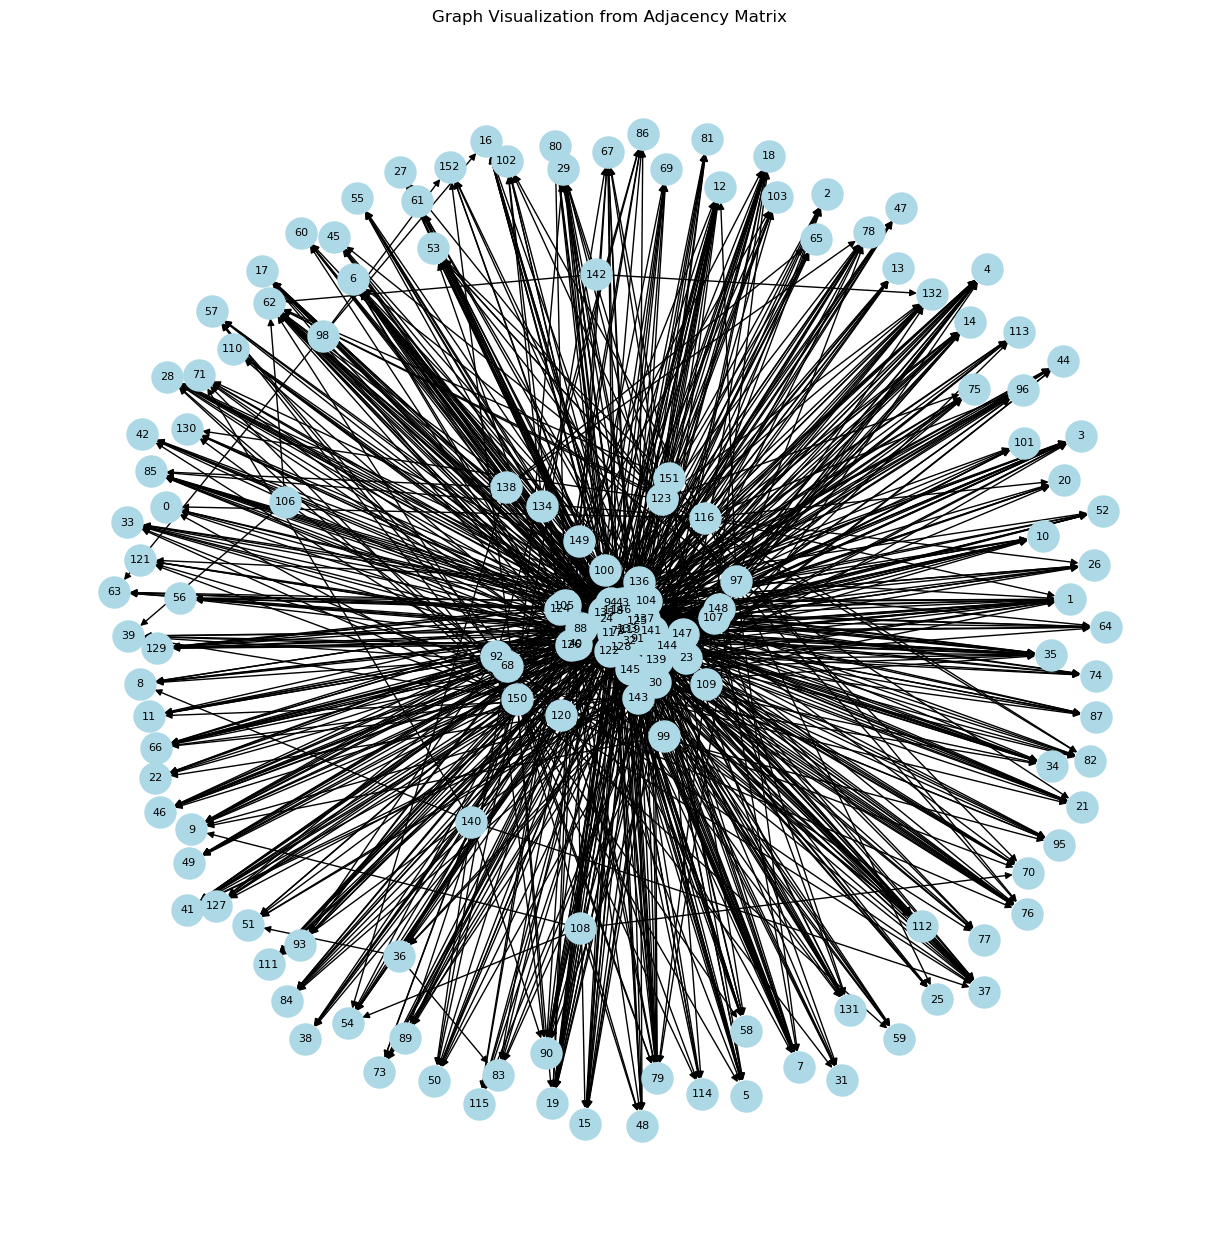

In [130]:
import networkx as nx
import scipy.sparse as sp
import matplotlib.pyplot as plt

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(np.array(adjMatrix), create_using=nx.DiGraph)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=500, node_color="lightblue", font_size=8, arrowsize=10)
plt.title("Graph Visualization from Adjacency Matrix")
plt.show()

In [133]:
import numpy as np

# Save the adjacency matrix as a NumPy binary file
np.save("adjacency_matrix.npy", adjMatrix)

In [ ]:
followingAdjDict = {}
for index, row in newdf.iterrows():
    rowdf = pd.DataFrame(row.followingList)
    adjList = []
    for user_id in unique_followingdf.id:
        if rowdf[rowdf['id'] == row.user_id].shape[0] != 0:
            adjList.append(user_id)
        followingAdjDict[user_id] = adjList

# is it possible to get a dictionary where a user has a list of all the users that follow them

KeyboardInterrupt: 

In [10]:
def check_user_in_following(user_id, dataframe):
    """
    Checks if a given user_id exists in the followingList of any other user in the dataframe.

    Args:
        user_id (int): The user_id to check.
        dataframe (pd.DataFrame): The dataframe containing user_id and followingList.

    Returns:
        bool: True if user_id exists in any followingList, False otherwise.
    """
    for _, row in dataframe.iterrows():
        following_list = [entry['id'] for entry in row['followingList']]
        if str(user_id) in following_list:
            return True
    return False

# Iterate through all user_ids in the dataframe and call the function
for user_id in newdf['user_id']:
    result = check_user_in_following(user_id, newdf)
    print(f"User ID {user_id}: {result}")
# result = check_user_in_following(119207499, newdf)
# print(result)

User ID 119207499: False
User ID 352931200: False
User ID 1194268750696108032: False
User ID 1078546238344257536: False
User ID 1033732377900720128: False
User ID 1191978160478392320: False
User ID 894135703: False
User ID 151115866: False
User ID 154271726: False
User ID 3402412635: False
User ID 923344636512317440: False
User ID 202956039: False
User ID 1253996347688202240: False
User ID 916355359945699328: False
User ID 3818365535: False


In [ ]:


df3 = pd.read_csv("./ClaimRealCOVID-19_tweets.csv", dtype={'tweet_id': str})

In [ ]:
# to access other datasets from the huggingface hub you can change the dataset name in the path
df = df[df["dataset"]=="antivax"][["tweet_id"]]

In [31]:
import numpy as np

In [23]:
df = df[df.tweet_id.apply(lambda x: x.isnumeric())]

In [27]:
df.to_csv('train.csv')

In [28]:
df2 = pd.read_csv('train.csv', dtype={'tweet_id': str})
df2 = df2.drop(df2.columns[0],axis=1)


In [26]:
df2

,tweet_id
0,1344794822691983360
1,1344794752819077120
2,1344790296119422976
3,1344789059290468352
4,1344788039319625728
...,...
10437,1413091144376885248
10438,1413090654356393984
10439,1413089672910213120
10440,1413088663886573568


In [64]:
df3

,tweet_id
0,1253283636843089920
1,1253965710520397828
2,1253959004436467713
3,1252584911183249409
4,1252577361545043968
...,...
6337,1221843359305818115
6338,1221841512696205312
6339,1221841094050230278
6340,1221840413700562944


In [61]:
df2.to_json('train.json', orient='records')

In [62]:
df3 = df3.drop(df3.columns[0],axis=1)


In [65]:
df3.to_json('CoAID.json', orient='records')